In [225]:
import scipy.io as sio
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
from scipy.integrate import simps
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy import signal
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from scipy.signal import butter, filtfilt, iirnotch


In [246]:
# preprocess data
def butterworth_filter(data, order, cutoff_freq, fs):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data, axis=1)
    return filtered_data

def notch_filter(data, notch_freq, q_factor, fs):
    b, a = iirnotch(notch_freq, q_factor, fs=fs)
    filtered_data = filtfilt(b, a, data, axis=1)
    return filtered_data

def high_pass_filter(data, cutoff_freq, sampling_rate):
    nyquist_freq = 0.5 * sampling_rate
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = butter(order, normalized_cutoff_freq, btype='high', analog=False, output='ba')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# def time_shift(signal, shift):
#     shifted_signal = np.roll(signal, shift)
#     if shift >= 0:
#         shifted_signal[:shift] = 0  # Set the first few samples to zero after forward shifting
#     else:
#         shifted_signal[shift:] = 0  # Set the last few samples to zero after backward shifting
#     return shifted_signal

def preprocess_data(eeg_data):
    fs = 256  # Sampling frequency
    order = 6  # Filter order
    cutoff_freq_low = 80  # Cutoff frequency for low pass
    cutoff_freq_high = 0.1  # Cutoff frequency for high pass
    notch_freq = 50  # Notch frequency
    q_factor = 30  # Quality factor
    # shifted_signal = time_shift(eeg_data, shift=12)
    filtered_data = butterworth_filter(eeg_data, order, cutoff_freq_low, fs)
    filtered_data_high = high_pass_filter(filtered_data, cutoff_freq_high, fs)
    notch_filtered_data = notch_filter(filtered_data_high, notch_freq, q_factor, fs)
    return notch_filtered_data

In [227]:
sig_1hz_before_coffee = []
sig_1hz_after_coffee = []
sig_5hz_before_coffee = []
sig_5hz_after_coffee = []
sig_10hz_before_coffee = []
sig_10hz_after_coffee = []
sig_15hz_before_coffee = []
sig_15hz_after_coffee = []
sig_20hz_before_coffee = []
sig_20hz_after_coffee = []
sig_25hz_before_coffee = []
sig_25hz_after_coffee = []
sig_30hz_before_coffee = []
sig_30hz_after_coffee = []

volunteers = ["1", "2", "3", "4", "5", "6"]
labels = ["A", "B"]

data_labels = []

# before coffee
for volunteer in volunteers:
    label = "B" # B = before coffee

    file_name = volunteer + "_" + label + ".mat"

    mat = sio.loadmat(file_name)
    mat = mat["ssvep"]

    data = []

    for stimuli in mat:
        stimuli_name = stimuli[1][0]
        stimuli_data = np.array(stimuli[0])
        stimuli_data = np.delete(stimuli_data, -1, axis=1)

        # preprocess data
        stimuli_data = preprocess_data(stimuli_data)

        if stimuli_name == "sig1Hz":
            sig_1hz_before_coffee.append(stimuli_data)
        elif stimuli_name == "sig5Hz":
            sig_5hz_before_coffee.append(stimuli_data)
        elif stimuli_name == "sig10Hz":
            sig_10hz_before_coffee.append(stimuli_data)
        elif stimuli_name == "sig15Hz":
            sig_15hz_before_coffee.append(stimuli_data)
        elif stimuli_name == "sig20Hz":
            sig_20hz_before_coffee.append(stimuli_data)
        elif stimuli_name == "sig25Hz":
            sig_25hz_before_coffee.append(stimuli_data)
        elif stimuli_name == "sig30Hz":
            sig_30hz_before_coffee.append(stimuli_data)

# after coffee
for volunteer in volunteers:
    label = "A" # A = after coffee

    file_name = volunteer + "_" + label + ".mat"

    mat = sio.loadmat(file_name)
    mat = mat["ssvep"]

    data = []

    for stimuli in mat:
        stimuli_name = stimuli[1][0]
        stimuli_data = np.array(stimuli[0])
        stimuli_data = np.delete(stimuli_data, -1, axis=1)

        # preprocess data
        stimuli_data = preprocess_data(stimuli_data)

        if stimuli_name == "sig1Hz":
            sig_1hz_after_coffee.append(stimuli_data)
        elif stimuli_name == "sig5Hz":
            sig_5hz_after_coffee.append(stimuli_data)
        elif stimuli_name == "sig10Hz":
            sig_10hz_after_coffee.append(stimuli_data)
        elif stimuli_name == "sig15Hz":
            sig_15hz_after_coffee.append(stimuli_data)
        elif stimuli_name == "sig20Hz":
            sig_20hz_after_coffee.append(stimuli_data)
        elif stimuli_name == "sig25Hz":
            sig_25hz_after_coffee.append(stimuli_data)
        elif stimuli_name == "sig30Hz":
            sig_30hz_after_coffee.append(stimuli_data)

In [228]:
np.array(sig_1hz_after_coffee).shape

(6, 5120, 22)

In [229]:
import csv
diff = np.abs(np.array(sig_1hz_before_coffee) - np.array(sig_1hz_after_coffee))
print(diff)

reshaped_vector = np.reshape(diff, (6 * 5120, 22))

# Define the filename for the CSV file
filename = "difference_vector.csv"

# Save the reshaped vector to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(reshaped_vector)

[[[  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  ...
  [ 58.10276702  60.85767975  57.30271295 ... 126.99476131 112.54569228
    34.32507172]
  [ 59.07868466  79.68816694  80.34785836 ... 143.79484145 132.69545177
    38.9202082 ]
  [ 69.59828483 111.0849285  108.49605204 ... 162.69816871 150.03203705
    40.51631692]]

 [[  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  ...
  [123.11159846 120.84160759  72.11256569 ... 101.77567162  69.03321884
    55.70866588]
  [141.19627087 144.28124523 107.7996806  ... 129.66879125  91.68029988
    70.85322973]
  [144.23800968 161.08188113 138.22106779 ... 150.73613

In [230]:
# def split_into_epochs(data):
#     # print(np.array(data).shape)
#     epochs = []
#     for i in range(5):
#         epoch = data[i*1024:(i+1)*1024, :]
#         epochs.append(epoch)
#     return np.array(epochs)

# # before coffe
# sig_1hz_before_coffee = np.array(sig_1hz_before_coffee)
# sig_5hz_before_coffee = np.array(sig_5hz_before_coffee)
# sig_10hz_before_coffee = np.array(sig_10hz_before_coffee)
# sig_15hz_before_coffee = np.array(sig_15hz_before_coffee)
# sig_20hz_before_coffee = np.array(sig_20hz_before_coffee)
# sig_25hz_before_coffee = np.array(sig_25hz_before_coffee)
# sig_30hz_before_coffee = np.array(sig_30hz_before_coffee)

# sig_1hz_before_coffee = np.array([split_into_epochs(data) for data in sig_1hz_before_coffee])
# sig_5hz_before_coffee = np.array([split_into_epochs(data) for data in sig_5hz_before_coffee])
# sig_10hz_before_coffee = np.array([split_into_epochs(data) for data in sig_10hz_before_coffee])
# sig_15hz_before_coffee = np.array([split_into_epochs(data) for data in sig_15hz_before_coffee])
# sig_20hz_before_coffee = np.array([split_into_epochs(data) for data in sig_20hz_before_coffee])
# sig_25hz_before_coffee = np.array([split_into_epochs(data) for data in sig_25hz_before_coffee])
# sig_30hz_before_coffee = np.array([split_into_epochs(data) for data in sig_30hz_before_coffee])

# # after coffe
# sig_1hz_after_coffee = np.array(sig_1hz_after_coffee)
# sig_5hz_after_coffee = np.array(sig_5hz_after_coffee)
# sig_10hz_after_coffee = np.array(sig_10hz_after_coffee)
# sig_15hz_after_coffee = np.array(sig_15hz_after_coffee)
# sig_20hz_after_coffee = np.array(sig_20hz_after_coffee)
# sig_25hz_after_coffee = np.array(sig_25hz_after_coffee)
# sig_30hz_after_coffee = np.array(sig_30hz_after_coffee)

# sig_1hz_after_coffee = np.array([split_into_epochs(data) for data in sig_1hz_after_coffee])
# sig_5hz_after_coffee = np.array([split_into_epochs(data) for data in sig_5hz_after_coffee])
# sig_10hz_after_coffee = np.array([split_into_epochs(data) for data in sig_10hz_after_coffee])
# sig_15hz_after_coffee = np.array([split_into_epochs(data) for data in sig_15hz_after_coffee])
# sig_20hz_after_coffee = np.array([split_into_epochs(data) for data in sig_20hz_after_coffee])
# sig_25hz_after_coffee = np.array([split_into_epochs(data) for data in sig_25hz_after_coffee])
# sig_30hz_after_coffee = np.array([split_into_epochs(data) for data in sig_30hz_after_coffee])

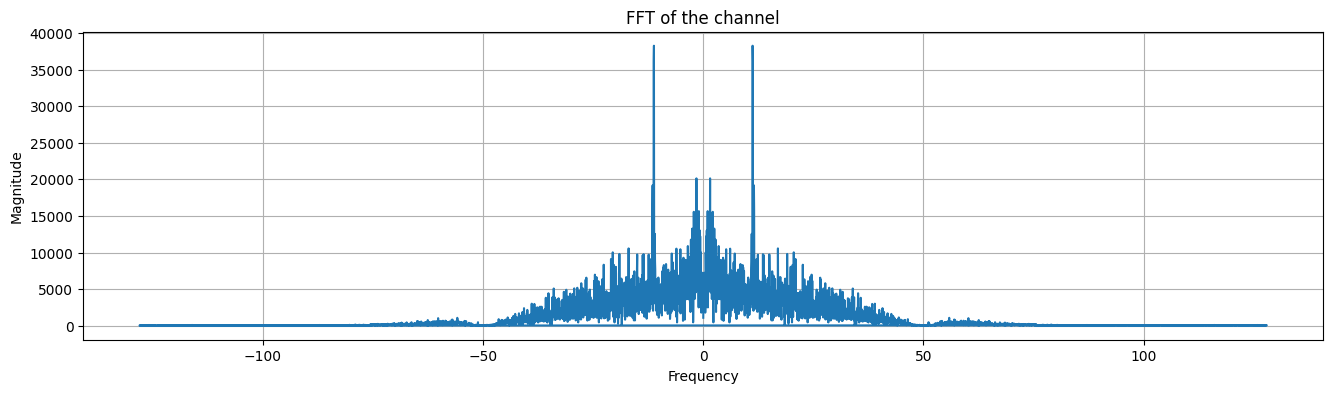

In [231]:
v1_a = sig_1hz_after_coffee[0].transpose()
# Select the first line of the signal
line = v1_a[0, :]
# Apply FFT to the selected line
fft_result = np.fft.fft(line)

# Calculate the frequency axis
sampling_freq = 256  
freq_axis = np.fft.fftfreq(line.shape[0], 1 / sampling_freq)
plt.figure(figsize=(16, 4))
# Plot the FFT result
plt.plot(freq_axis, np.abs(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT of the channel')
plt.grid(True)
plt.show()

In [232]:
def fft_decompose(signal):
    # Generate sample data
    fs = 256  # Sampling frequency (Hz)
    t = np.arange(0, 4, 1/fs)  # Time vector
    f1 = 10  # Frequency of the first sinusoid (Hz)
    f2 = 20  # Frequency of the second sinusoid (Hz)

    # Perform FFT
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), 1/fs)  # Frequency axis
    return fft_result, frequencies

In [233]:
def mean(x):
    return np.array(np.mean(x))

def std(x): 
    return np.array(np.std(x))

# def ptp(x): 
#   return np.array(np.ptp(x))

def var(x):
    return np.array(np.var(x))

def skewness(x):
    return np.array(stats.skew(x))

def kurtosis(x):
    return np.array(stats.kurtosis(x,axis=-1))

def get_fft_features(fft_result, frequencies):
    band_start = 12
    band_end = 30

    psd = np.abs(fft_result) ** 2
    total_power = np.sum(psd)
    power_in_band = signal.lombscargle(frequencies, fft_result, [band_start, band_end])  # Replace band_start and band_end with desired frequency range

    # Frequency Band Power Ratios
    delta_band = signal.lombscargle(frequencies, fft_result, [1, 4])  # Delta band (1-4 Hz)
    theta_band = signal.lombscargle(frequencies, fft_result, [4, 8])  # Theta band (4-8 Hz)
    alpha_band = signal.lombscargle(frequencies, fft_result, [8, 12])  # Alpha band (8-12 Hz)
    beta_band = signal.lombscargle(frequencies, fft_result, [12, 30])  # Beta band (12-30 Hz)
    gamma_band = signal.lombscargle(frequencies, fft_result, [30, 100])  # Gamma band (30-100 Hz)

    total_power_band = delta_band + theta_band + alpha_band + beta_band + gamma_band
    delta_ratio = delta_band / total_power_band
    theta_ratio = theta_band / total_power_band
    alpha_ratio = alpha_band / total_power_band
    beta_ratio = beta_band / total_power_band
    gamma_ratio = gamma_band / total_power_band

    # Peak Frequency and Amplitude
    peak_index = np.argmax(np.abs(fft_result))
    peak_frequency = frequencies[peak_index]
    peak_amplitude = np.abs(fft_result[peak_index])

    # Spectral Edge Frequency
    power_cumulative = np.cumsum(psd)
    total_power_threshold = 0.95 * total_power
    spectral_edge_index = np.argmax(power_cumulative > total_power_threshold)
    spectral_edge_frequency = frequencies[spectral_edge_index]

    # Stack all features into a single-dimensional array
    features = np.hstack([
        total_power,
        power_in_band,
        delta_ratio,
        theta_ratio,
        alpha_ratio,
        beta_ratio,
        gamma_ratio,
        peak_frequency,
        peak_amplitude,
        spectral_edge_frequency
    ])

    return features

def concatenate_features(x):
    fft_result, frequencies = fft_decompose(x)
    fft_features = get_fft_features(fft_result, frequencies)
    return np.hstack((mean(x), std(x), var(x), skewness(x), kurtosis(x),fft_features))

In [234]:
def extract_features(x):
    # receives a (1024, 22) matrix which represents 22 channels of 1024 samples each
    # returns a (1, 264) matrix which represents 22 channels of 12 features each
    # features: mean, std, ptp, var, min, max, argmin, argmax, rms, abs_diff_signal, skewness, kurtosis, fft_features
    x = np.transpose(x)
    output = []
    for channel in x:
        # print(concatenate_features(channel).shape)
        output.append(concatenate_features(channel))
    return np.array(np.hstack(output))

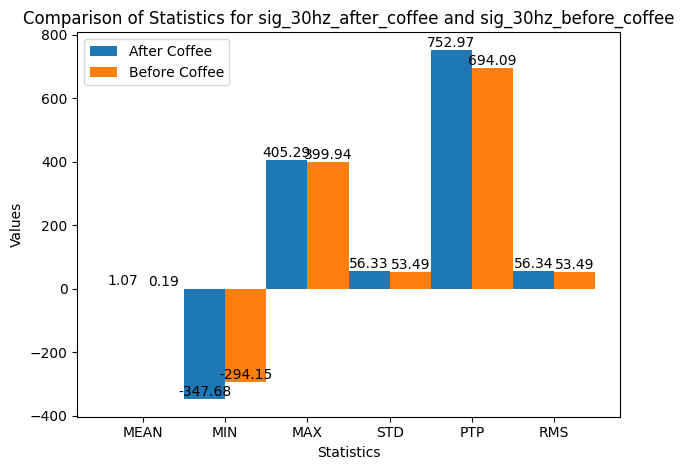

In [235]:
# Function definitions
def mean(x):
    return np.mean(x)

def minim(x):
    return np.min(x)

def maxim(x):
    return np.max(x)

def std(x):
    return np.std(x)

def ptp(x):
    return np.ptp(x)

def rms(x):
    return np.sqrt(np.mean(np.square(x)))

# Calculate the values for sig_5Hz_after_coffee
MEAN_after = mean(sig_30hz_after_coffee)
MIN_after = minim(sig_30hz_after_coffee)
MAX_after = maxim(sig_30hz_after_coffee)
STD_after = std(sig_30hz_after_coffee)
PTP_after = ptp(sig_30hz_after_coffee)
RMS_after = rms(sig_30hz_after_coffee)

# Calculate the values for sig_30hz_before_coffee
MEAN_before = mean(sig_30hz_before_coffee)
MIN_before = minim(sig_30hz_before_coffee)
MAX_before = maxim(sig_30hz_before_coffee)
STD_before = std(sig_30hz_before_coffee)
PTP_before = ptp(sig_30hz_before_coffee)
RMS_before = rms(sig_30hz_before_coffee)


# Plot the values
labels = ['MEAN', 'MIN', 'MAX', 'STD', 'PTP', 'RMS']
values_after = [MEAN_after, MIN_after, MAX_after, STD_after, PTP_after, RMS_after]
values_before = [MEAN_before, MIN_before, MAX_before, STD_before, PTP_before, RMS_before]
bar_width = 0.5
x_pos = np.arange(len(labels))

plt.bar(x_pos, values_after, width=bar_width, label='After Coffee')
plt.bar(x_pos + bar_width, values_before, width=bar_width, label='Before Coffee')

# Add the values on top of the bars with adjusted positioning
for i, v in enumerate(values_after):
    plt.text(i, v + 0.3, f"{float(round(v, 2))}", ha='center', va='bottom')
    
for i, v in enumerate(values_before):
    plt.text(i + bar_width, v + 0.3, f"{float(round(v, 2))}", ha='center', va='bottom')

plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Comparison of Statistics for sig_30hz_after_coffee and sig_30hz_before_coffee')
plt.xticks(x_pos + bar_width / 2, labels)
plt.legend()
plt.tight_layout()
plt.show()

In [236]:
def get_X_Y(before, after):

    b = np.array(before)
    a = np.array(after)

    # a and b have the same shape (6, 5120, 22)

    # combine all 6 volunteers into one matrix (6*5120, 22)
    b_out = np.reshape(b, (b.shape[0] * b.shape[1], b.shape[2]))
    a_out = np.reshape(a, (a.shape[0] * a.shape[1], a.shape[2]))

    # # split 30720 rows into 30 chunks of 1024 rows
    b_out = np.split(b_out, 30)
    a_out = np.split(a_out, 30)

    # extract features from each chunk
    b_out = [extract_features(x) for x in b_out]
    a_out = [extract_features(x) for x in a_out]

    X = np.vstack((b_out, a_out))
    Y = np.array([0] * 30 + [1] * 30)

    return X, Y

In [237]:
def get_accuracy_for_SVM(before, after):
    X, Y = get_X_Y(before, after)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Hyperparameter tuning with k-fold cross-validation
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    svm = SVC()
    kfold = StratifiedKFold(n_splits=2, shuffle=True)
    grid_search = GridSearchCV(svm, param_grid, cv=kfold)
    grid_search.fit(X_scaled, Y)

    # Retrieve the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Train the SVM model with the best hyperparameters
    svm_best = SVC(**best_params)
    svm_best.fit(X_scaled, Y)
    print("Best Classifier:", svm_best)

    # Perform cross-validation to obtain accuracy scores
    cv_scores = cross_val_score(svm_best, X_scaled, Y, cv=kfold, scoring='f1_macro')

    # Calculate the average accuracy
    average_accuracy = cv_scores.mean()
    print("Accuracies: ", cv_scores)
    print("Average Accuracy: ", average_accuracy)

    # conf = confusion_matrix(X_scaled, Y)
    # print(conf)


    return average_accuracy

In [238]:
np.array(sig_1hz_before_coffee).shape

(6, 5120, 22)

c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'C': 1, 'kernel': 'poly'}
Best Classifier: SVC(C=1, kernel='poly')
Accuracies:  [0.33333333 0.4       ]
Average Accuracy:  0.3666666666666667


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'C': 10, 'kernel': 'sigmoid'}
Best Classifier: SVC(C=10, kernel='sigmoid')
Accuracies:  [0.59821429 0.66063348]
Average Accuracy:  0.6294238849385909


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best Classifier: SVC(C=10)
Accuracies:  [0.33333333 0.54171563]
Average Accuracy:  0.4375244810027419


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'C': 10, 'kernel': 'sigmoid'}
Best Classifier: SVC(C=10, kernel='sigmoid')
Accuracies:  [0.29922136 0.46428571]
Average Accuracy:  0.38175353567455905


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'C': 10, 'kernel': 'sigmoid'}
Best Classifier: SVC(C=10, kernel='sigmoid')
Accuracies:  [0.55428571 0.36026936]
Average Accuracy:  0.4572775372775373


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'C': 10, 'kernel': 'sigmoid'}
Best Classifier: SVC(C=10, kernel='sigmoid')
Accuracies:  [0.36596218 0.26339286]
Average Accuracy:  0.3146775186715398


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Best Classifier: SVC(C=0.1, kernel='linear')
Accuracies:  [0.53125    0.45701357]
Average Accuracy:  0.4941317873303167
Mean accuracy:  0.4402079159374218


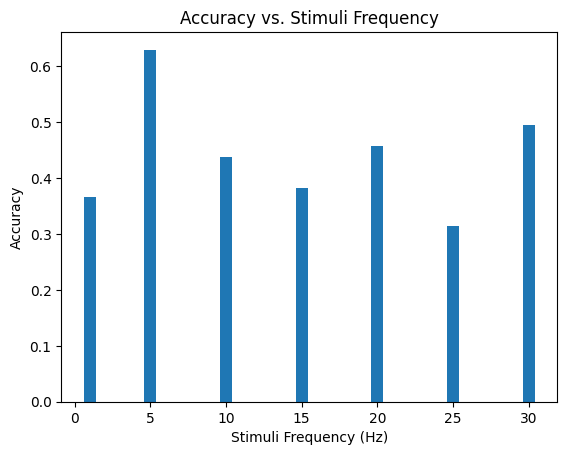

In [239]:
accuracy_1hz = get_accuracy_for_SVM(sig_1hz_before_coffee, sig_1hz_after_coffee)
accuracy_5hz = get_accuracy_for_SVM(sig_5hz_before_coffee, sig_5hz_after_coffee)
accuracy_10hz = get_accuracy_for_SVM(sig_10hz_before_coffee, sig_10hz_after_coffee)
accuracy_15hz = get_accuracy_for_SVM(sig_15hz_before_coffee, sig_15hz_after_coffee)
accuracy_20hz = get_accuracy_for_SVM(sig_20hz_before_coffee, sig_20hz_after_coffee)
accuracy_25hz = get_accuracy_for_SVM(sig_25hz_before_coffee, sig_25hz_after_coffee)
accuracy_30hz = get_accuracy_for_SVM(sig_30hz_before_coffee, sig_30hz_after_coffee)


# plot results
x = [1, 5, 10, 15, 20, 25, 30]
y = [accuracy_1hz, accuracy_5hz, accuracy_10hz, accuracy_15hz, accuracy_20hz, accuracy_25hz, accuracy_30hz]
mean_acc = np.mean(y)
print("Mean accuracy: ", mean_acc)
plt.bar(x, y)
plt.xlabel("Stimuli Frequency (Hz)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Stimuli Frequency")
plt.show()

In [240]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
class EEGkNNClassifier:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Calculate distances between the test sample and all training samples
            distances = [euclidean(x, x_train) for x_train in self.X_train]
            # Sort distances and get indices of k nearest neighbors
            indices = np.argsort(distances)[:self.k]
            # Get the labels of the k nearest neighbors
            labels = self.y_train[indices]
            # Predict the label by majority voting
            y_pred.append(np.bincount(labels).argmax())
        return np.array(y_pred)

   
X, y = get_X_Y(sig_1hz_before_coffee, sig_1hz_after_coffee)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
   
# Create and train the EEG kNN classifier
k = 7  # number of nearest neighbors
eeg_classifier = EEGkNNClassifier(k)
eeg_classifier.fit(X_train, y_train)

# Predict labels for the test dataset
y_pred = eeg_classifier.predict(X_test)
accuracy = f1_score(y_test, y_pred)

print("Accuracy:", accuracy,"%")

c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Accuracy: 0.6 %


In [241]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
def KNN(before, after):
    X, y = get_X_Y(before, after)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Scale the features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    # Perform grid search
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, scoring='f1_macro', cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Train the KNN classifier with the best hyperparameters
    knn_best = KNeighborsClassifier(**best_params)
    knn_best.fit(X_train_scaled, y_train)

    # Predict the labels of the test set
    y_pred = knn_best.predict(X_test_scaled)

    # Evaluate the accuracy of the classifier
    accuracy = f1_score(y_test, y_pred)
    print("Best Hyperparameters:", best_params)
    print("Best Score:", best_score)
    print("Accuracy:", accuracy)

    return accuracy

c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best Score: 0.5823232323232322
Accuracy: 0.6153846153846154


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Score: 0.517983682983683
Accuracy: 0.20000000000000004


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best Score: 0.49257575757575756
Accuracy: 0.6153846153846154


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Score: 0.6213131313131312
Accuracy: 0.4615384615384615


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best Score: 0.4691774891774892
Accuracy: 0.6153846153846154


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Score: 0.615
Accuracy: 0.22222222222222224


c:\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.ascontiguousarray(y, dtype=np.float64)


Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Score: 0.46358585858585855
Accuracy: 0.6
Mean accuracy:  0.47570207570207573


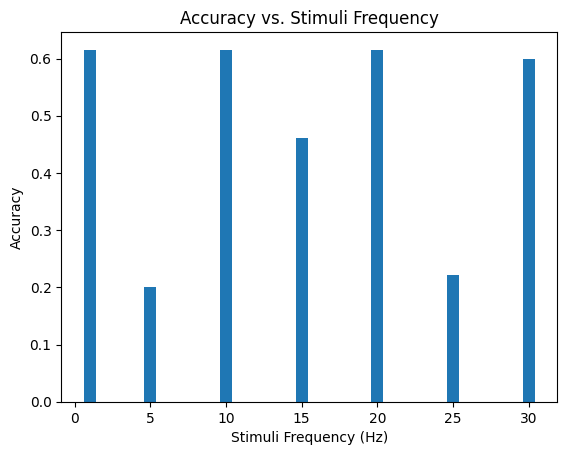

In [242]:
accuracy_1hz = KNN(sig_1hz_before_coffee, sig_1hz_after_coffee)
accuracy_5hz = KNN(sig_5hz_before_coffee, sig_5hz_after_coffee)
accuracy_10hz = KNN(sig_10hz_before_coffee, sig_10hz_after_coffee)
accuracy_15hz = KNN(sig_15hz_before_coffee, sig_15hz_after_coffee)
accuracy_20hz = KNN(sig_20hz_before_coffee, sig_20hz_after_coffee)
accuracy_25hz = KNN(sig_25hz_before_coffee, sig_25hz_after_coffee)
accuracy_30hz = KNN(sig_30hz_before_coffee, sig_30hz_after_coffee)

# plot results
x = [1, 5, 10, 15, 20, 25, 30]
y = [accuracy_1hz, accuracy_5hz, accuracy_10hz, accuracy_15hz, accuracy_20hz, accuracy_25hz, accuracy_30hz]
mean_acc = np.mean(y)
print("Mean accuracy: ", mean_acc)
plt.bar(x, y)
plt.xlabel("Stimuli Frequency (Hz)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Stimuli Frequency")
plt.show()

In [243]:
import torch
import torch.nn as nn
device = (
    "cuda:0"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")
print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

if torch.cuda.is_available():
    # Create a tensor on CPU
    tensor = torch.Tensor([1])
    print("Tensor on CPU:", tensor)

    # Move the tensor to GPU
    tensor = tensor.to('cuda')
    print("Tensor on GPU:", tensor)

    # Check if the tensor is on GPU
    if tensor.is_cuda:
        print("CUDA is using the GPU.")
    else:
        print("CUDA is using the CPU.")
else:
    print("CUDA is not available.")

Using cpu device
Is CUDA supported by this system? True
CUDA version: 11.7
ID of current CUDA device: 0
Name of current CUDA device: NVIDIA GeForce GTX 1650
Tensor on CPU: tensor([1.])
Tensor on GPU: tensor([1.], device='cuda:0')
CUDA is using the GPU.


In [244]:
class myLSTM(nn.Module):
  def __init__(self, input_size=1, hidden_size=50, out_size=1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size, hidden_size )
    self.linear = nn.Linear(hidden_size, out_size)
    self.hidden = (torch.zeros(1,1,hidden_size ) , torch.zeros(1,1,hidden_size)  )
 
  def forward(self, seq):
    lstm_out, self.hidden = self.lstm(seq.view( len(seq),1,-1 ), self.hidden )
    pred = self.linear(lstm_out.view(  len(seq) ,-1 ))  
    return pred[-1]

In [245]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y).long()

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

dataset = CustomDataset(X, Y)
# data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


NameError: name 'Y' is not defined

In [ ]:
test_size = 20
train_set = Y[:-test_size]
test_set = Y[-test_size:]

In [ ]:
def input_data(seq, ws):
  output = []   
  L = len(seq)
  for i in range((L) - ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    print(i)
    output.append((window, label))
 
  return output

In [ ]:
window_size = 64
train_data = input_data(train_set, window_size)

In [ ]:
input_size = 616
hidden_size = 128
num_layers = 2
num_classes = 2
batch_size = 16
epochs = 50
learning_rate = 0.001

model = myLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
print(model)

myLSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
for p in model.parameters():
  print(p.numel())


200
10000
200
200
50
1


In [ ]:
epochs = 10
future = 40
for i in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size) ,
                    torch.zeros(1,1,model.hidden_size))
    
    y_pred = model(seq)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
 
  print(f"Epoch {i} Loss {loss.item()} ")
  preds = train_set[-window_size:].tolist()
 
  for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
      model.hidden = (torch.zeros(1,1,model.hidden_size) ,
                      torch.zeros(1,1,model.hidden_size))
      preds.append(model(seq).item())
 
  loss = criterion(torch.tensor(preds[-window_size :]), y[760:] )
  print(f'Performance on test range: {loss}')

NameError: name 'loss' is not defined

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class EEGNET(nn.Module):
    def __init__(self, receptive_field=64, mean_pool=5, filter_sizing, dropout, D):
        super(EEGNET,self).__init__()
        channel_amount = 8
        num_classes = 3
        self.temporal=nn.Sequential(
            nn.Conv2d(1,filter_sizing,kernel_size=[1,receptive_field],stride=1, bias=False, padding='same'), 
            nn.BatchNorm2d(filter_sizing)
        )
        self.spatial=nn.Sequential(
            nn.Conv2d(filter_sizing,filter_sizing*D,kernel_size=[channel_amount,1],bias=False, groups=filter_sizing),
            nn.BatchNorm2d(filter_sizing*D),
            nn.ELU(True)
        )

        self.seperable=nn.Sequential(
            nn.Conv2d(filter_sizing*D,filter_sizing*D,kernel_size=[1,16], padding='same',groups=filter_sizing*D, bias=False),
            nn.Conv2d(filter_sizing*D,filter_sizing*D,kernel_size=[1,1], padding='same',groups=1, bias=False),
            nn.BatchNorm2d(filter_sizing*D),
            nn.ELU(True)
        )
        self.avgpool1 = nn.AvgPool2d([1, 5], stride=[1, 5], padding=0)   
        self.avgpool2 = nn.AvgPool2d([1, 5], stride=[1, 5], padding=0)
        self.dropout = nn.Dropout(dropout)
        self.view = nn.Sequential(Flatten())

        endsize = 320
        self.fc2 = nn.Linear(endsize, num_classes)

    def forward(self,x):
        out = self.temporal(x)
        out = self.spatial(out)
        out = self.avgpool1(out)
        out = self.dropout(out)
        out = self.seperable(out)
        out = self.avgpool2(out)
        out = self.dropout(out)
        out = out.view(out.size(0), -1)
        prediction = self.fc2(out)
        return prediction

SyntaxError: non-default argument follows default argument (4165255278.py, line 6)

In [ ]:
# from mne.time_frequency import psd_array_welch
# # eeg_power_band(epochs):
# freq_bands = {
#     'delta' : [0.5, 4],
#     'theta' : [4, 8],
#     'alpha' : [8, 12],  
#     'beta_low' : [12.5, 16],
#     'beta' : [16.5, 20],   
#     'beta_high' : [20.5,28],
#     'gamma' : [30, 100]
# }

# psds, freqs = psd_array_welch(signal, fmin=0.5, fmax=45, sfreq=256, n_fft=128, n_per_seg=32 )
# psds/=np.sum(psds, axis=-1, keepdims=True)
# band_arr = []
# for fmin, fmax in freq_bands.values():
#     psds_band = psds[(freqs >= fmin) & (freqs < fmax)].mean()
#     band_arr.append(psds_band)
# print( np.concatenate(band_arr, axis=1))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

class EEGDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Load data
X_train, y_train = load_data(train=True)
X_test, y_test = load_data(train=False)

# Create dataset and dataloader
train_dataset = EEGDataset(X_train, y_train)
test_dataset = EEGDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define hyperparameters
input_size = X_train.shape[2]
hidden_size = 128
num_layers = 2
num_classes = 2
learning_rate = 0.001
num_epochs = 10

# Create LSTM classifier
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 10 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy: {:.2f}%'.format(100 * correct / total))

TypeError: get_X_Y() got an unexpected keyword argument 'train'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

samples = 1024
n_features = 22
time_steps = 4000

# code for building an LSTM with 100 neurons and dropout. Runs for 50 epochs

model = Sequential()
model.add(LSTM(100, return_sequences=False, input_shape=(time_steps, n_features)))
model.add(Dropout(0.5))
#model.add(LSTM(100)) dramatically worse results
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=50)
score = model.evaluate(x_test, y_test, batch_size=16)

Epoch 1/50


ValueError: in user code:

    File "c:\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 4000, 22), found shape=(16, 616)


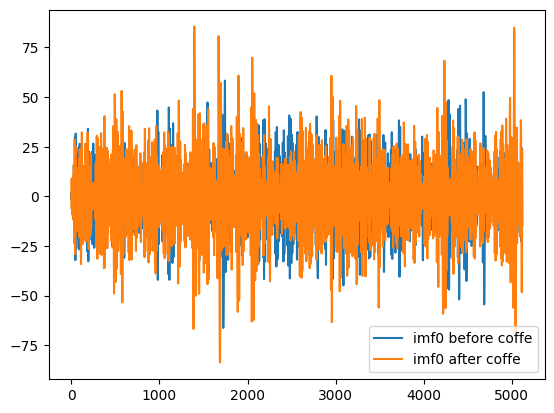

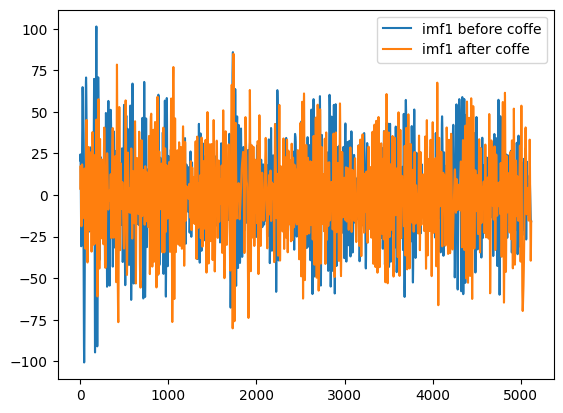

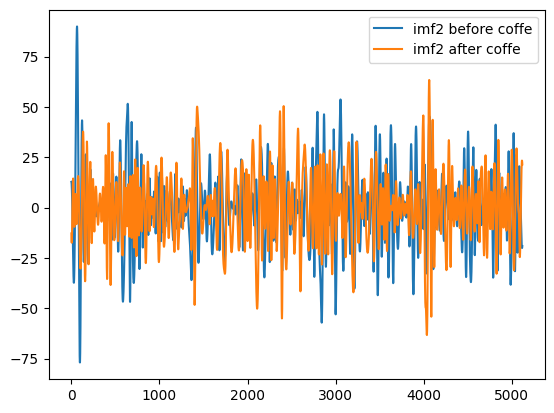

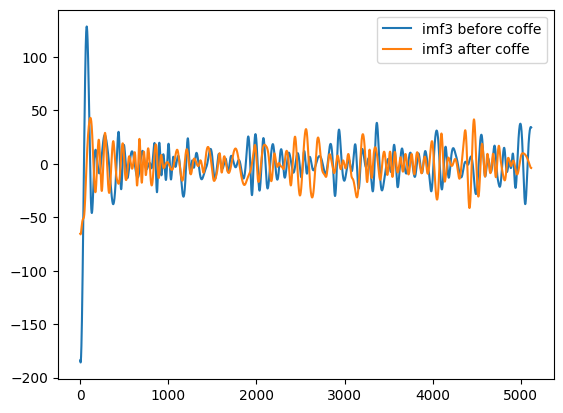

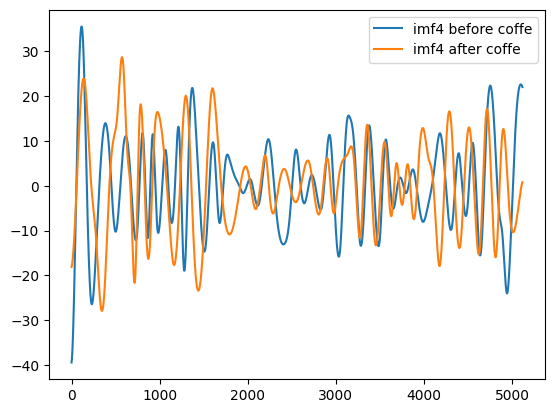

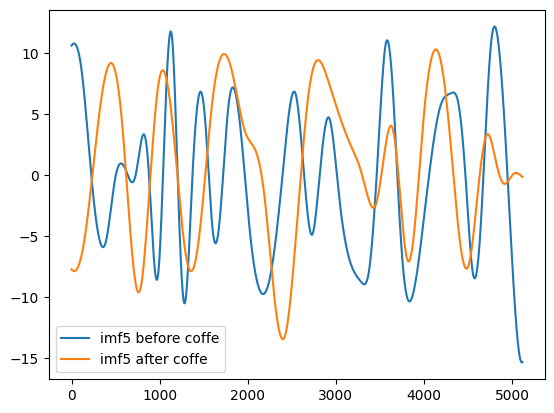

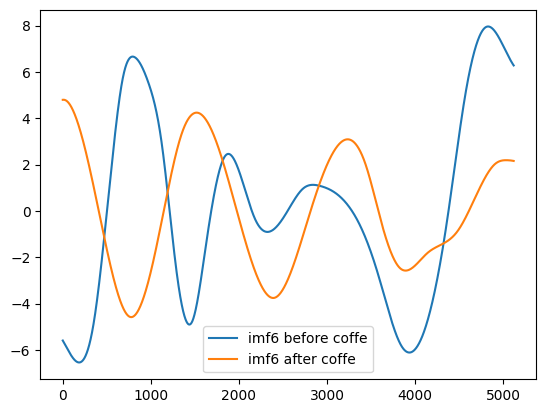

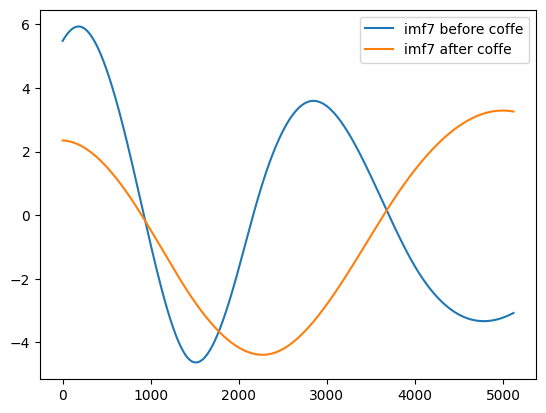

IndexError: index 8 is out of bounds for axis 0 with size 8

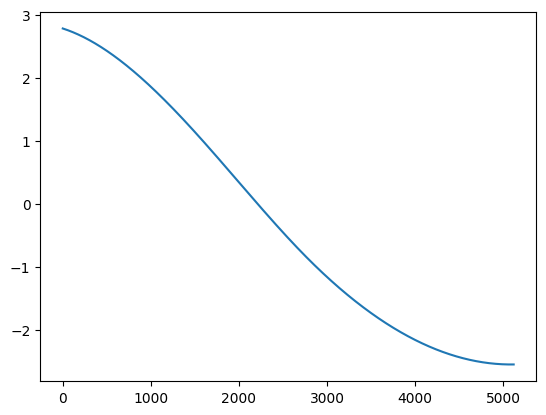

In [ ]:
# plot sig 1hz before coffee - first volunteer, first channel

data = sig_10hz_before_coffee[1][:, 0]

data2 = sig_10hz_after_coffee[1][:, 0]

# lets do empirical mode decomposition
emd = EMD()
imfs = emd(data)

# lets do emd for data2
emd2 = EMD()
imfs2 = emd2(data2)

# lets plot all imfs for data and data2 on the same plot to compare
for i in range(len(imfs)):
    # plot imf for data and data2
    plt.plot(imfs[i], label="imf" + str(i) + " before coffee")
    plt.plot(imfs2[i], label="imf" + str(i) + " after coffee")

    plt.legend()

    plt.show()

In [ ]:
def plot_welch(data, data2, window_seconds):
    # Define window length (4 seconds)
    sf = 256
    win = window_seconds * sf
    freqs, psd = signal.welch(data, sf, nperseg=win)
    freqs2, psd2 = signal.welch(data2, sf, nperseg=win)

    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.plot(freqs2, psd2, color='r', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, max(psd.max(), psd2.max()) * 1.1])
    plt.title("Welch's periodogram")
    plt.xlim([0, max(freqs.max(), freqs2.max())])
    sns.despine()

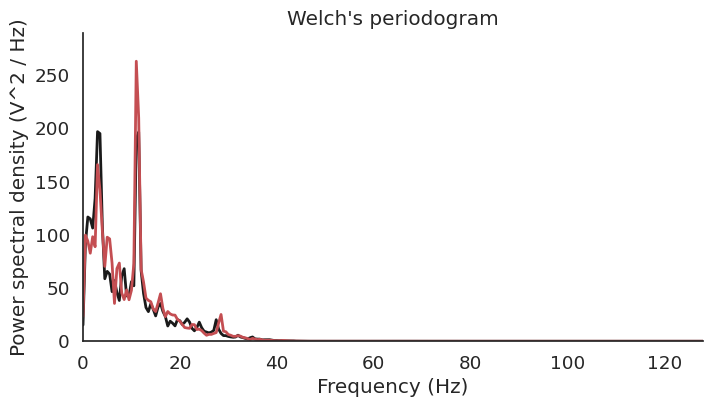

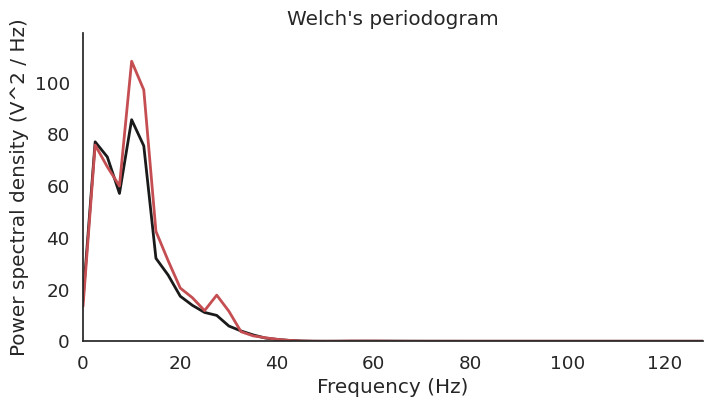

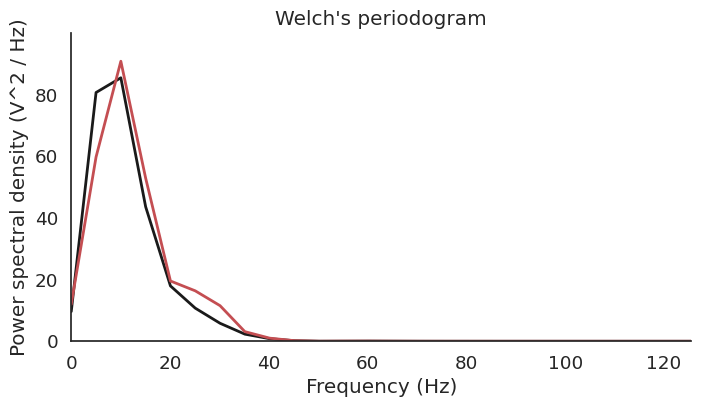

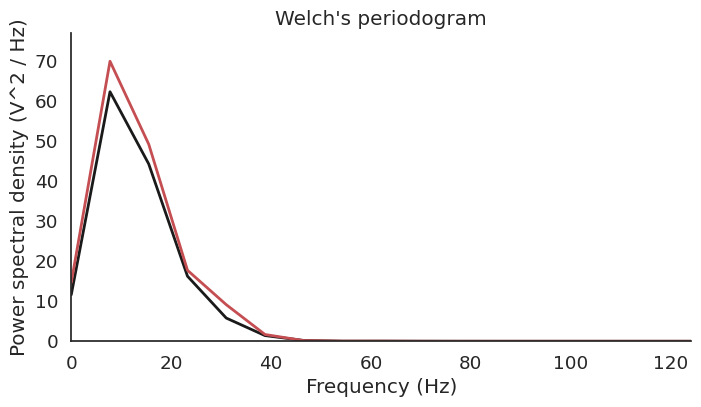

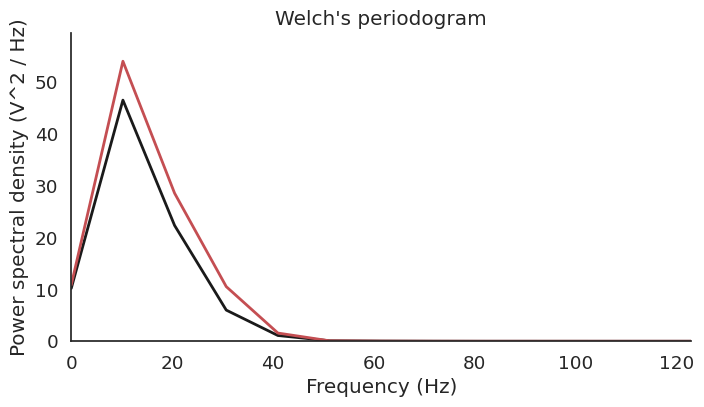

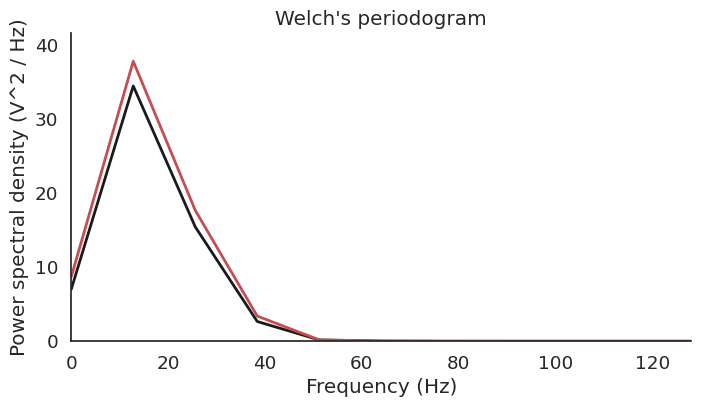

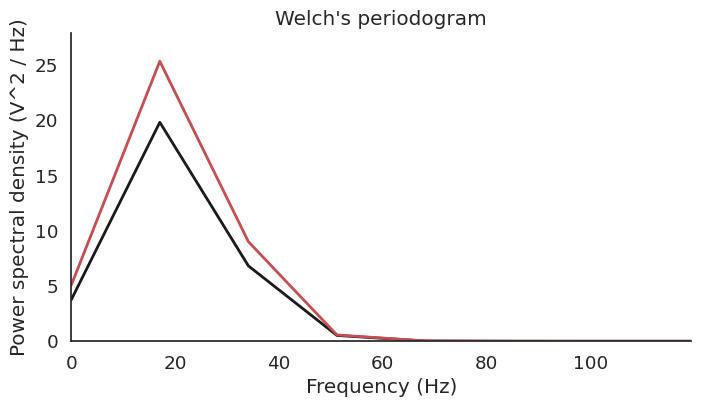

In [ ]:
data = sig_1hz_before_coffee[1][:, 0]
data2 = sig_1hz_after_coffee[1][:, 0]

# window size must be at least 2 cycles of the frquecy of interest
# 1hz = once per second so window size must be at least 2 seconds
plot_welch(data, data2, 2)



data = sig_5hz_before_coffee[1][:, 0]
data2 = sig_5hz_after_coffee[1][:, 0]

# window size must be at least 2 cycles of the frquecy of interest
# 5hz = 5 times per second so window size must be at least 0.4 seconds

plot_welch(data, data2, 0.4)


data = sig_10hz_before_coffee[1][:, 0]
data2 = sig_10hz_after_coffee[1][:, 0]

# window size must be at least 2 cycles of the frquecy of interest
# 10hz = 10 times per second so window size must be at least 0.2 seconds

plot_welch(data, data2, 0.2)


data = sig_15hz_before_coffee[1][:, 0]
data2 = sig_15hz_after_coffee[1][:, 0]

# window size must be at least 2 cycles of the frquecy of interest
# 15hz = 15 times per second so window size must be at least 0.13 seconds

plot_welch(data, data2, 0.13)


data = sig_20hz_before_coffee[1][:, 0]
data2 = sig_20hz_after_coffee[1][:, 0]

# window size must be at least 2 cycles of the frquecy of interest
# 20hz = 20 times per second so window size must be at least 0.1 seconds

plot_welch(data, data2, 0.1)


data = sig_25hz_before_coffee[1][:, 0]
data2 = sig_25hz_after_coffee[1][:, 0]

# window size must be at least 2 cycles of the frquecy of interest
# 25hz = 25 times per second so window size must be at least 0.08 seconds

plot_welch(data, data2, 0.08)


data = sig_30hz_before_coffee[1][:, 0]
data2 = sig_30hz_after_coffee[1][:, 0]

# window size must be at least 2 cycles of the frquecy of interest
# 30hz = 30 times per second so window size must be at least 0.06 seconds

plot_welch(data, data2, 0.06)


In [ ]:
# todo: calculate beta band average band power for each channel for each volunteer for each stimuli
# todo: plot results based on stimuli and channel


